In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Reference the file where the CSV is located
college_csv_path = "correct_output.csv"

# Import the data into a Pandas DataFrame
college_df = pd.read_csv(college_csv_path)
college_df

,School Name,School ID,School Type,School Size,10 Year Median Earnings,10 Year Mean Earnings,Lat,Lng,City,State,SAT Scores,ACT Scores,Admission Rate,Average Gross Cost,Average Net Price,Locale
0,University of California-Merced,445188,Public,7375.0,NaN,NaN,37.366237,-120.424944,Merced,CA,1114.0,24.0,0.6979,34330.0,13223.0,41.0
1,University of Southern California,123961,Private,18942.0,74000.0,88800.0,34.021281,-118.284169,Los Angeles,CA,1437.0,32.0,0.1595,69547.0,30232.0,11.0
2,West Los Angeles College,125471,Public,9622.0,31500.0,37300.0,34.004512,-118.386664,Culver City,CA,NaN,NaN,NaN,13255.0,6823.0,21.0
3,Pueblo Community College,127884,Public,3641.0,27700.0,31900.0,38.262124,-104.636258,Pueblo,CO,NaN,NaN,NaN,20783.0,14860.0,12.0
4,University of Colorado Boulder,126614,Public,28565.0,50800.0,59700.0,40.008781,-105.270823,Boulder,CO,1293.0,28.0,0.7984,29215.0,20706.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,Fresno Pacific University,114813,Private,2791.0,43900.0,45600.0,36.726831,-119.735199,Fresno,CA,1050.0,20.0,0.7239,38420.0,16177.0,11.0
1002,Foothill College,114716,Public,13873.0,46500.0,58300.0,37.361655,-122.127964,Los Altos Hills,CA,NaN,NaN,NaN,11726.0,5291.0,21.0
1003,Skyline College,123509,Public,8084.0,40500.0,45600.0,37.630420,-122.467335,San Bruno,CA,NaN,NaN,NaN,8929.0,1945.0,21.0
1004,Eastern Florida State College,132693,Public,12306.0,29300.0,34000.0,28.383610,-80.756474,Cocoa,FL,NaN,NaN,NaN,10069.0,5974.0,21.0


In [3]:
new_df=college_df[["School Type", "School Name", "Admission Rate","10 Year Mean Earnings","School Size"]]
new_df=new_df.dropna()
new_df.head()

,School Type,School Name,Admission Rate,10 Year Mean Earnings,School Size
1,Private,University of Southern California,0.1595,88800.0,18942.0
4,Public,University of Colorado Boulder,0.7984,59700.0,28565.0
8,Private,Wesleyan University,0.1629,63400.0,2887.0
9,Private,Yale University,0.0693,124400.0,5742.0
11,Public,Central Connecticut State University,0.6676,51600.0,9317.0


In [4]:
# Create the bins in which Data will be held
# Bins are   
bins = [0,.25, .50, .75,1]

# Create the names for the four bins
group_names = ["1","2","3","4"]

In [5]:
new_df["Admission Summary"] = pd.cut(new_df["Admission Rate"], bins, labels=group_names)
new_df.head()

,School Type,School Name,Admission Rate,10 Year Mean Earnings,School Size,Admission Summary
1,Private,University of Southern California,0.1595,88800.0,18942.0,1
4,Public,University of Colorado Boulder,0.7984,59700.0,28565.0,4
8,Private,Wesleyan University,0.1629,63400.0,2887.0,1
9,Private,Yale University,0.0693,124400.0,5742.0,1
11,Public,Central Connecticut State University,0.6676,51600.0,9317.0,3


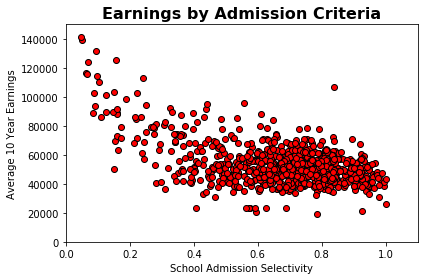

In [6]:
# scatter plot between admission rate and earnings 

admission=new_df["Admission Rate"]
ernings=new_df["10 Year Mean Earnings"]

# Without scoop_price
plt.scatter(admission,ernings,marker="o", facecolors="red", edgecolors="black")
plt.ylim(0,150000)
plt.xlim(0.0,1.1)
# Give the chart a title, x label, and y label
plt.title("Earnings by Admission Criteria",fontsize=16, fontweight="bold")
plt.xlabel("School Admission Selectivity")
plt.ylabel("Average 10 Year Earnings")
plt.tight_layout()
plt.show()

In [18]:
plt.savefig("Graphs_and_Charts/admission_scatter.png")

<Figure size 432x288 with 0 Axes>

In [8]:
new_df["School Type"].value_counts()

Public     452
Private    363
Name: School Type, dtype: int64

In [9]:
group1_data= new_df.groupby(["Admission Summary"])
group1_data.mean()

,Admission Rate,10 Year Mean Earnings,School Size
Admission Summary,,,
1,0.149329,94757.894737,7889.131579
2,0.400341,60009.565217,11258.252174
3,0.648808,51446.045198,8789.706215
4,0.845399,49262.987013,8466.412338


In [10]:

grouped_data = new_df.groupby(['Admission Summary', 'School Type'])

grouped_data.count().head(20)

School Name  Admission Rate  \
Admission Summary School Type                                
1                 Private               34              34   
                  Public                 4               4   
2                 Private               57              57   
                  Public                58              58   
3                 Private              169             169   
                  Public               185             185   
4                 Private              103             103   
                  Public               205             205   

                               10 Year Mean Earnings  School Size  
Admission Summary School Type                                      
1                 Private                         34           34  
                  Public                           4            4  
2                 Private                         57           57  
                  Public                          58           58  
3                 Private                        169          169  
                  Public                         185          185  
4                 Private                        103          103  
                  Public                         205          205

In [11]:
grouped_data1 = new_df.groupby(['Admission Summary'])
grouped_data1.mean()

,Admission Rate,10 Year Mean Earnings,School Size
Admission Summary,,,
1,0.149329,94757.894737,7889.131579
2,0.400341,60009.565217,11258.252174
3,0.648808,51446.045198,8789.706215
4,0.845399,49262.987013,8466.412338


In [12]:
quartiles = ["<.25", "<.50", "<.75", "<1"]
Earnings = Earnings = [94757,60009, 51446, 49262]
x_axis = np.arange(len(quartiles))

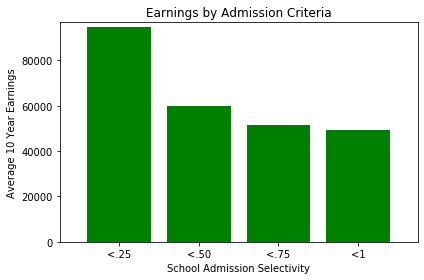

In [17]:
# Create a bar chart based upon the above data
plt.bar(x_axis, Earnings, color="g", align="center")
# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, quartiles)
# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.25)
# Set the limits of the y axis
plt.ylim(0, max(Earnings)+2000)
# Give the chart a title, x label, and y label
plt.title("Earnings by Admission Criteria")
plt.xlabel("School Admission Selectivity")
plt.ylabel("Average 10 Year Earnings")
plt.tight_layout()
plt.savefig("Graphs_and_Charts/admission_earnings_bar.png")
plt.show()

In [14]:
size_df=grouped_data.max()
size_df.head(20)

School Name  \
Admission Summary School Type                                                
1                 Private                                  Yale University   
                  Public       University of North Carolina at Chapel Hill   
2                 Private                  Worcester Polytechnic Institute   
                  Public                       Western Carolina University   
3                 Private                     York College of Pennsylvania   
                  Public                       Youngstown State University   
4                 Private                               Wingate University   
                  Public               Wright State University-Main Campus   

                               Admission Rate  10 Year Mean Earnings  \
Admission Summary School Type                                          
1                 Private              0.2452               153600.0   
                  Public               0.2440                85900.0   
2                 Private              0.4979                95400.0   
                  Public               0.4990                79400.0   
3                 Private              0.7496                88500.0   
                  Public               0.7463                95600.0   
4                 Private              1.0000               106500.0   
                  Public               1.0000                72400.0   

                               School Size  
Admission Summary School Type               
1                 Private          18942.0  
                  Public           30994.0  
2                 Private          45364.0  
                  Public           56366.0  
3                 Private          48666.0  
                  Public           52568.0  
4                 Private          68214.0  
                  Public           42181.0

In [15]:
grouped_data["Admission Summary", "10 Year Mean Earnings"].mean()

10 Year Mean Earnings
Admission Summary School Type                       
1                 Private               96879.411765
                  Public                76725.000000
2                 Private               67070.175439
                  Public                53070.689655
3                 Private               53307.100592
                  Public                49745.945946
4                 Private               53227.184466
                  Public                47271.219512